# Starbucks Capstone Challenge

## Table of contents

[1. Introduction](#intro)

[2. Problem Statement](#statement)
  * [A. Strategy](#strategy)
  * [B. Metrics](#metrics)
  * [C. Refinement](#refinement)

[3. Data Sets](#data)
  * [A. Portfolio.json](#portfolio)
   
  * [B. Profile.json](#profile)
  
  * [C. Transcript.json](#transcript)
  
    
[4. Data Analysis](#analysis)

  * [Data Exploration & Visualization](#exploaration)
   
      * [A. Portfolio.json](#portfolio_analysis)

      * [B. Profile.json](#profile_analysis)

      * [C. Transcript.json](#transcript_analysis)
   
  
[5. Methodology](#methodology)
  * [A. Data Preprocessing](#preprocessing)
  * [B. Storing Data](#storing)

  * [C. Implementation](#implementation)
  
  * [D. Refinement](#refining)

[6. Results](#results)
  * [A. Answering Questions](#answering)

  * [B. Justification](#justification)
  
  
[7. Conclusion](#conclusion)
  * [A. Reflection](#reflection)

  * [B. Improvement](#improvement)

<a id='intro'></a>
## 1. Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

A. In a *BOGO offer*, a user needs to spend a certain amount to get a reward equal to that threshold amount.

B. In a *discount*, a user gains a reward equal to a fraction of the amount spent.

C. In an *informational offer*, there is no reward, but **neither** is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels.

Not all users receive the same offer, and that is the challenge to solve with this data set.

The program used to create the data simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.

Each person in the simulation has some hidden traits that influence their purchasing patterns and are associated with their observable traits. People produce various events, including receiving offers, opening offers, and making purchases.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has **one** product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. *You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.*

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='statement'></a>
## 2. Problem Statement

The basic task is to use the data to identify which groups of people are most responsive to each type of offer (and how best to present each type of offer).

<a id='strategy '></a>
### A. Strategy 
1- Combine transaction, demographic and offer data.

2- Determine which demographic groups respond best to which offer type.

3- May be we can check the number/percent of offers completed withouth viewing.

4- How best to present each type of offer.

5- Try to assess what a certain demographic group will buy when not receiving any offers so you won't send them any.

<a id='metrics'></a>
### B. Metrics
Response is measured by number of completed offers and/or transacion.

<a id='refinement'></a>
### C. Refinement
May be we can first show results of gender and age, then refine by adding income..
Or just anything similar.

<a id='data'></a>

## 3. Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

<a id='portfolio'></a>
### A. Portfolio.json

Offers sent during 30-day test period (10 offers x 6 fields)

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational (an advertisement for a drink).
* difficulty (int) - minimum  money required to be spent to complete an offer and receive reward.
* reward (int) - reward given for completing an offer (money awarded for the amount spent).
* duration (int) - time for offer to be open, in days.
* channels (list of strings) - web, email, mobile, social.

<a id='profile'></a>
### B. Profile.json

Rewards program users (17000 users x 5 fields)

* age (int) - age of the customer. Missing value encoded as 118
* became_member_on (int) - date when customer created an app account (date format YYYYMMDD)
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

<a id='transcript'></a>
### C. Transcript.json

Event log (306648 events x 4 fields)

* event (str) - record description (ie transaction, offer received, offer viewed, offer completed).
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - different values depending on event type:
    - offer id: (string/hash) not associated with any "transaction"
    - amount: (numeric) money spent in "transaction"
    - reward: (numeric) money gained from "offer completed"

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

<a id='analysis'></a>
## 4. Data Analysis
<a id='exploaration'></a>
### Data Exploration & Visualization

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='portfolio_analysis'></a>
#### A. Portfolio.json

In [2]:
portfolio.shape

(10, 6)

In [3]:
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [5]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [6]:
portfolio.offer_type.value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

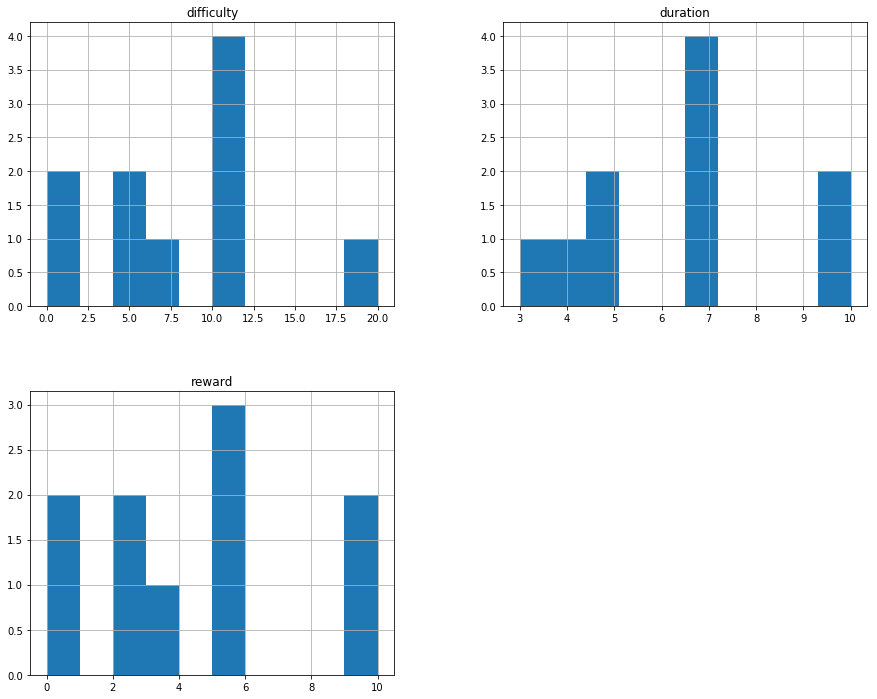

In [7]:
portfolio.hist(figsize= (15,12));  #histogram of whole dataset

*Every thing looks good. No cleaning required.*

<a id='profile_analysis'></a>
#### B. Profile.json

In [8]:
profile.head() # Remember to check for duplicates

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
profile.shape

(17000, 5)

In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


*Same number of missing gender & income values. Those probably belong to customers of unknown age (118)* 

In [11]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


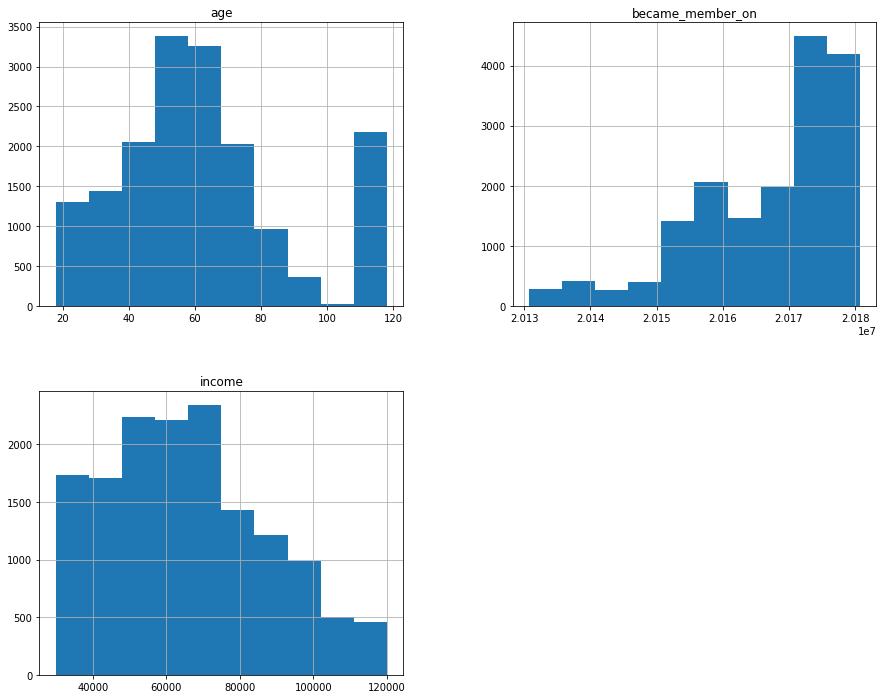

In [12]:
profile.hist(figsize= (15,12));  #histogram of whole dataset

- Age of most customers  falls between 50 and 70 years.
- Most customers beacme members between 2017 & 2018.
- Income of most customers falls between 50,000 and 75,000.

**So, do purchases and response to offers correspond to these results?**

In [13]:
profile[profile.isna().any(axis=1)]

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN
10,118,20170824,None,c4863c7985cf408faee930f111475da3,NaN
11,118,20150919,None,148adfcaa27d485b82f323aaaad036bd,NaN
17,118,20170801,None,744d603ef08c4f33af5a61c8c7628d1c,NaN
23,118,20170907,None,2b826eba31074a059d63b0ae8f50b7d5,NaN


*All customers of unknwon age (118) have no gender nor income info. Those coulde be removed.*

In [14]:
profile.age.value_counts().sort_index(ascending=False)

118    2175
101       5
100      12
99        5
98        5
97       13
96        8
95       22
94       33
93       29
92       40
91       47
90       52
89       53
88       64
87       66
86       54
85       70
84       83
83      102
82      105
81      118
80      116
79      117
78      135
77      141
76      155
75      159
74      193
73      209
       ... 
47      232
46      212
45      231
44      192
43      215
42      227
41      189
40      202
39      182
38      172
37      197
36      175
35      118
34      147
33      152
32      139
31      113
30      131
29      129
28      137
27      139
26      157
25      136
24      139
23      126
22      131
21      140
20      135
19      135
18       70
Name: age, Length: 85, dtype: int64

*Oldest customers are 101 years old. Hmm... Interesting..*

<a id='transcript_analysis'></a>
#### C. Transcript.json

In [15]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


*May be this table can be pivoted by person to look like Person, Time of offer received, Time of offer viewed, time of offer completed,offer id,  reward, amount*

In [16]:
#Just a thought..
person_event = transcript.groupby(['person', 'event'])['time'].max().unstack()
person_event.head()

event,offer completed,offer received,offer viewed,transaction
person,,,,
0009655768c64bdeb2e877511632db8f,576.0,576.0,540.0,696.0
00116118485d4dfda04fdbaba9a87b5c,NaN,576.0,630.0,474.0
0011e0d4e6b944f998e987f904e8c1e5,576.0,504.0,516.0,654.0
0020c2b971eb4e9188eac86d93036a77,510.0,504.0,660.0,708.0
0020ccbbb6d84e358d3414a3ff76cffd,600.0,504.0,582.0,672.0


In [17]:
person_event.columns
#There is no person column, so can't refer to persons by their ids.

Index(['offer completed', 'offer received', 'offer viewed', 'transaction'], dtype='object', name='event')

In [18]:
transcript.shape

(306534, 4)

In [19]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [20]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


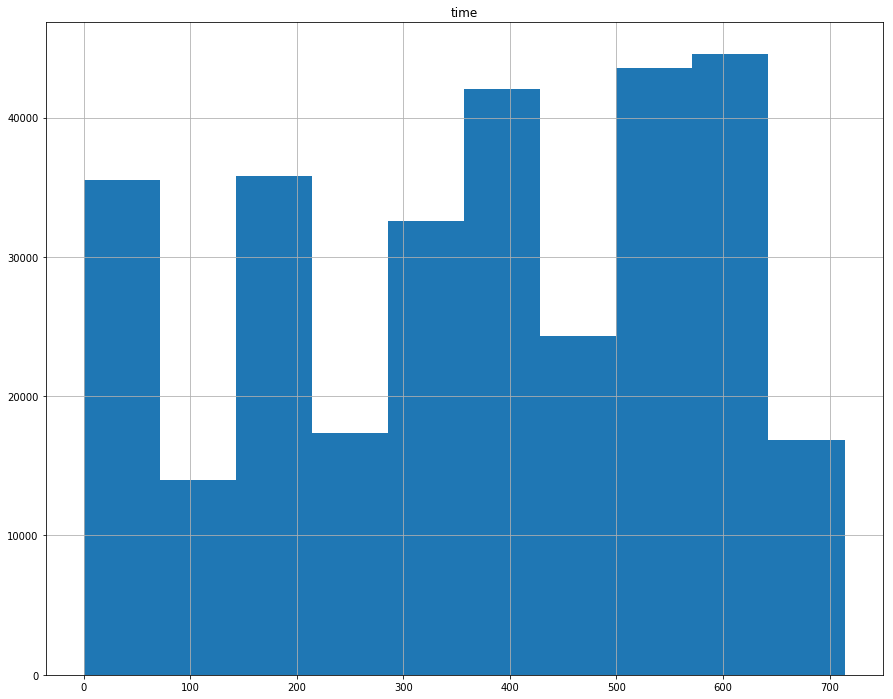

In [21]:
transcript.hist(figsize= (15,12));  #histogram of whole dataset

In [22]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

*Percent of completed offers = 33579/76277 x 100 = 44.022%*

In [23]:
transcript.person.value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
a42ed50acc4d4b25bca647c9e0b916ad    46
bd2cdd691aca4bb0a0e039979ee5de5c    46
b1f4ece7d49342628a9ed77aee2cde58    46
28681c16026943e68f26feaccab0907f    46
ab25fd6fbd5040f880751921e4029757    44
86e9d338b85b4177b369fe6b0ad4fed3    43
d087fd0166404163b7d1e1e7cf2a9ac7    43
4142f5e23db741b1af4be0287dc91c1c    43
9ae56116908640fc83477982da0aaec4    43
ca265792e65949d79b2b0e91bdd31c57    43
0ebc3c4c39234ab6a2701fe2525705a9    42
cd9bac9e8aea4609929a55b9b468c88e    42
8e7d398d4bd948e397e201ad2bd5cce8    42
0d74b166a5e54b269795dbaf38c6dfae    42
40ce078d5b2a43d19138a788754520be    42
edc7b04392144da9979f3077095f268a    42
1d755c218f714559a57ee7df7e6b1ca0    41
417c8e42cba54dd0ba1ea7ee079ef87a    41
5da599f0f0ca40a6916e28487a55e655    41
81a263ee0b8544b6a8910ee690cc6edd    41
f0a3a3c05e3c4e2e84929a49a

In [24]:
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

*Offer id sometimes written as offer_id. This needs standardization*

<a id='methodology'></a>
## 5. Methodology
<a id='preprocessing'></a>
### A. Data Preprocessing

In [25]:
# Change 'offer id' to 'offer_id' in value column

transcript_value_list = []

for value in transcript.value.values:
    # Keys are hashable which usually implies they're immutable and can't be modified. So, we create a new key-value pair equals
    # the one we want to rename (with correct name) and delete the wrong one.
    if 'offer id' in value.keys():
        value['offer_id'] = value['offer id']
        del value['offer id']
    transcript_value_list.append(value)

transcript_value_list

[{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': '2906b810c7d4411798c6938adc9daaa5'},
 {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'},
 {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},
 {'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d'},
 {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},
 {'offer_id': '3f207df678b143eea3cee63160fa8bed'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd'},
 {'offer_id': '3f207df678b143eea3cee63160fa8bed'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'},
 {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'offer_id': '2906b810c7d4411798c6938adc9daaa5'},
 {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
 {'offer_id': 'ae264e3637204a6f

In [26]:
# Create dataframe from transcript_value_list
transcript_value = pd.DataFrame(transcript_value_list, columns = ['offer_id', 'reward', 'amount'])
transcript_value.head()

,offer_id,reward,amount
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [27]:
transcript_value.info()
# offer_id values increased to 167581 instead of 134002 after changing 'offer id' to 'offer_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 3 columns):
offer_id    167581 non-null object
reward      33579 non-null float64
amount      138953 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.0+ MB


In [28]:
# Merge transcript & new_transcript datasets using index.
new_transcript = pd.merge(transcript, transcript_value, left_index=True, right_index=True)
new_transcript.head()

,event,person,time,value,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [29]:
new_transcript.sample(20)

,event,person,time,value,offer_id,reward,amount
270018,offer viewed,98da26ac30d94be693bc1c0050b73aae,594,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
72213,offer viewed,06b99e8cc24b426f8a578c749974b88a,180,{'offer_id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
215313,transaction,6c2c85ad5b244122a70425e6be34e0fd,504,{'amount': 6.46},NaN,NaN,6.46
165876,transaction,baed4fb2389046e3bfa57253b3d6d6bb,408,{'amount': 1.51},NaN,NaN,1.51
76236,offer viewed,04aa84f9a46a4920b70386c3fe60165d,186,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
118517,offer received,1c0392ee64b3495abdebc3d6002f027c,336,{'offer_id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
54229,offer received,f7c9157f08384ff29f1d11e9388ed4c2,168,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN
147922,offer viewed,277d5c3110104e278963d796465f45a8,396,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd'},ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN
256135,offer received,8f5146270f5745d4862514da8a7b6620,576,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
169055,offer viewed,1981c9ebfc3c4e1fa532035806a8c60e,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN


In [30]:
# Merge profile & new_transcript datasets using id in profile and person in new_transcript.
profile_new_transcript = pd.merge(profile, new_transcript, left_on='id', right_on = 'person', how='left' )
profile_new_transcript.head()

,age,became_member_on,gender,id,income,event,person,time,value,offer_id,reward,amount
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,offer received,68be06ca386d4c31939f3a4f0e3dd783,168,{'offer_id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,NaN
1,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,offer viewed,68be06ca386d4c31939f3a4f0e3dd783,216,{'offer_id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,NaN
2,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,offer received,68be06ca386d4c31939f3a4f0e3dd783,336,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
3,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,offer viewed,68be06ca386d4c31939f3a4f0e3dd783,348,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
4,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,transaction,68be06ca386d4c31939f3a4f0e3dd783,360,{'amount': 0.35000000000000003},NaN,NaN,0.35


In [31]:
profile_new_transcript.shape

(306534, 12)

In [32]:
transcript.loc[(transcript.person == '68be06ca386d4c31939f3a4f0e3dd783'), 'value']

53174      {'offer_id': '2906b810c7d4411798c6938adc9daaa5'}
85290      {'offer_id': '2906b810c7d4411798c6938adc9daaa5'}
110828     {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
130147     {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
135224                      {'amount': 0.35000000000000003}
150596     {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'}
163374     {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'}
167626                                     {'amount': 0.74}
182544                       {'amount': 1.8900000000000001}
201570     {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
214274     {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
218392                                     {'amount': 5.04}
230411                                     {'amount': 0.38}
237364                                     {'amount': 2.12}
237365    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
237366    {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...
245122     {'offer_id': 'fafdcd668e3743c

In [33]:
transcript.loc[(transcript.person == '68be06ca386d4c31939f3a4f0e3dd783'), 'event']

53174      offer received
85290        offer viewed
110828     offer received
130147       offer viewed
135224        transaction
150596     offer received
163374       offer viewed
167626        transaction
182544        transaction
201570     offer received
214274       offer viewed
218392        transaction
230411        transaction
237364        transaction
237365    offer completed
237366    offer completed
245122     offer received
262137       offer viewed
274519        transaction
283959        transaction
301915        transaction
Name: event, dtype: object

In [34]:
#Drop rows with no demographic values as they will not give us any insights after analysis even if they have made purchases.
no_nan = profile_new_transcript.dropna(subset=['gender'])
no_nan.head()

,age,became_member_on,gender,id,income,event,person,time,value,offer_id,reward,amount
21,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,18,{'amount': 21.51},NaN,NaN,21.51
22,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,144,{'amount': 32.28},NaN,NaN,32.28
23,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,408,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
24,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,504,{'offer_id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,NaN,NaN
25,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,528,{'amount': 23.22},NaN,NaN,23.22


In [35]:
# Merge no_nan & portfolio datasets using offer_id in id and person in portfolio.
new_df = pd.merge(no_nan, portfolio, left_on='offer_id', right_on = 'id', how='left' )
new_df.head()
# Need to rename reward_x & reward_y

,age,became_member_on,gender,id_x,income,event,person,time,value,offer_id,reward_x,amount,channels,difficulty,duration,id_y,offer_type,reward_y
0,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,18,{'amount': 21.51},NaN,NaN,21.51,NaN,NaN,NaN,NaN,NaN,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,144,{'amount': 32.28},NaN,NaN,32.28,NaN,NaN,NaN,NaN,NaN,NaN
2,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,408,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,"[web, email, mobile]",5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0
3,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,504,{'offer_id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,NaN,NaN,"[web, email, mobile]",0.0,4.0,3f207df678b143eea3cee63160fa8bed,informational,0.0
4,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,528,{'amount': 23.22},NaN,NaN,23.22,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Drop person's id (id_x) since it's no longer needed as "person" column replaced it.
# Drop value since it's been extracted into separate columns.
# Drop id_y since it's the same as offer id.
final_df = new_df.drop(columns=['id_x', 'value', 'id_y'])
# Rename columns
final_df = final_df.rename(columns = {'reward_x':'earned_reward', 'reward_y': 'offer_reward',
                                      'time':'event_time', 'duration': 'offer_duration'})
final_df.head(10)

,age,became_member_on,gender,income,event,person,event_time,offer_id,earned_reward,amount,channels,difficulty,offer_duration,offer_type,offer_reward
0,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,18,NaN,NaN,21.51,NaN,NaN,NaN,NaN,NaN
1,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,144,NaN,NaN,32.28,NaN,NaN,NaN,NaN,NaN
2,55,20170715,F,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0
3,55,20170715,F,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,504,3f207df678b143eea3cee63160fa8bed,NaN,NaN,"[web, email, mobile]",0.0,4.0,informational,0.0
4,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,528,NaN,NaN,23.22,NaN,NaN,NaN,NaN,NaN
5,55,20170715,F,112000.0,offer completed,0610b486422d4921ae7d2bf64640c50b,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0
6,75,20170509,F,100000.0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0
7,75,20170509,F,100000.0,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0
8,75,20170509,F,100000.0,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,NaN,NaN,19.89,NaN,NaN,NaN,NaN,NaN
9,75,20170509,F,100000.0,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0


In [37]:
# Rename columns
final_df = final_df.rename(columns = {'reward_x':'earned_reward', 'reward_y': 'offer_reward',
                                      'time':'event_time', 'duration': 'offer_duration'})
final_df.head()

,age,became_member_on,gender,income,event,person,event_time,offer_id,earned_reward,amount,channels,difficulty,offer_duration,offer_type,offer_reward
0,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,18,NaN,NaN,21.51,NaN,NaN,NaN,NaN,NaN
1,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,144,NaN,NaN,32.28,NaN,NaN,NaN,NaN,NaN
2,55,20170715,F,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,"[web, email, mobile]",5.0,7.0,bogo,5.0
3,55,20170715,F,112000.0,offer received,0610b486422d4921ae7d2bf64640c50b,504,3f207df678b143eea3cee63160fa8bed,NaN,NaN,"[web, email, mobile]",0.0,4.0,informational,0.0
4,55,20170715,F,112000.0,transaction,0610b486422d4921ae7d2bf64640c50b,528,NaN,NaN,23.22,NaN,NaN,NaN,NaN,NaN


In [38]:
# Re-arrange columns
final_df = final_df[['person', 'age', 'gender', 'income','became_member_on', 'event', 'event_time', 'offer_type',
                     'offer_reward', 'earned_reward', 'amount','offer_id', 'channels', 'difficulty', 'offer_duration']]
final_df.head(10)

,person,age,gender,income,became_member_on,event,event_time,offer_type,offer_reward,earned_reward,amount,offer_id,channels,difficulty,offer_duration
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,18,NaN,NaN,NaN,21.51,NaN,NaN,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,144,NaN,NaN,NaN,32.28,NaN,NaN,NaN,NaN
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,offer received,408,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,offer received,504,informational,0.0,NaN,NaN,3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0.0,4.0
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,528,NaN,NaN,NaN,23.22,NaN,NaN,NaN,NaN
5,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,offer completed,528,bogo,5.0,5.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer received,0,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
7,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer viewed,6,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,132,NaN,NaN,NaN,19.89,NaN,NaN,NaN,NaN
9,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer completed,132,bogo,5.0,5.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0


In [39]:
final_df_by_person = final_df.groupby('person')
final_df_by_person.head()
# Useless. Missing rows (ex: row 5)

,person,age,gender,income,became_member_on,event,event_time,offer_type,offer_reward,earned_reward,amount,offer_id,channels,difficulty,offer_duration
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,18,NaN,NaN,NaN,21.51,NaN,NaN,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,144,NaN,NaN,NaN,32.28,NaN,NaN,NaN,NaN
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,offer received,408,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,offer received,504,informational,0.0,NaN,NaN,3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0.0,4.0
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,528,NaN,NaN,NaN,23.22,NaN,NaN,NaN,NaN
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer received,0,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
7,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer viewed,6,bogo,5.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,132,NaN,NaN,NaN,19.89,NaN,NaN,NaN,NaN
9,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,offer completed,132,bogo,5.0,5.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,144,NaN,NaN,NaN,17.78,NaN,NaN,NaN,NaN


In [40]:
final_df.shape

(272762, 15)

In [41]:
final_df.describe()

,age,income,became_member_on,event_time,offer_reward,earned_reward,amount,difficulty,offer_duration
count,272762.000000,272762.000000,2.727620e+05,272762.000000,148805.000000,32444.000000,123957.000000,148805.000000,148805.000000
mean,53.840696,64337.000755,2.016526e+07,366.707694,4.442445,4.948249,13.996325,7.890561,6.625207
std,17.551337,21243.762941,1.209695e+04,200.359087,3.372362,2.905376,31.749420,5.041335,2.133035
min,18.000000,30000.000000,2.013073e+07,0.000000,0.000000,2.000000,0.050000,0.000000,3.000000
25%,41.000000,48000.000000,2.016032e+07,186.000000,2.000000,2.000000,3.660000,5.000000,5.000000
50%,55.000000,62000.000000,2.017041e+07,408.000000,5.000000,5.000000,10.800000,10.000000,7.000000
75%,66.000000,78000.000000,2.017113e+07,528.000000,5.000000,5.000000,19.130000,10.000000,7.000000
max,101.000000,120000.000000,2.018073e+07,714.000000,10.000000,10.000000,1062.280000,20.000000,10.000000


<a id='storing'></a>
### B. Storing Data

In [42]:
final_df.to_csv('final_df.csv')

<a id='implementation'></a>
### C. Implementation

In [43]:
# Amount spent by gender
amount_by_gender = dict(final_df.groupby('gender')['amount'].sum())
amount_by_gender

{'F': 863695.00000001106, 'M': 844890.85999999952, 'O': 26356.540000000001}

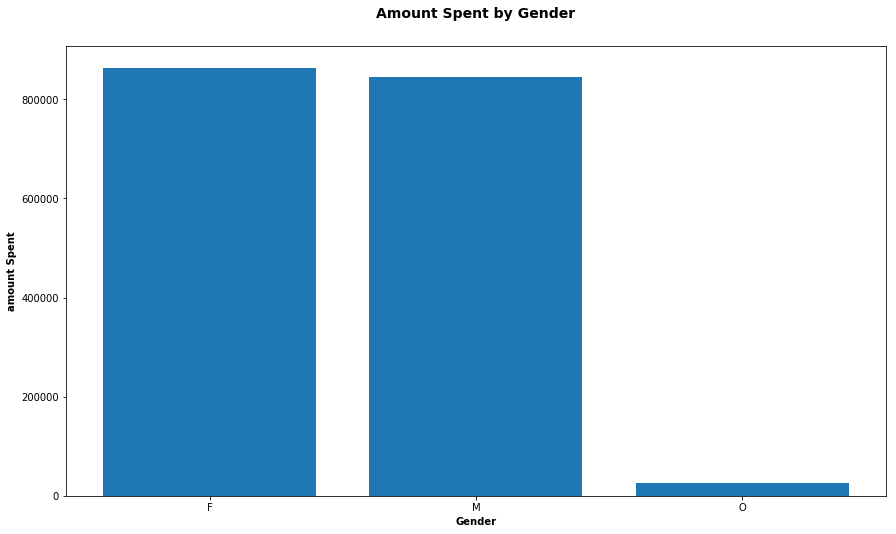

In [44]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
plt.bar(amount_by_gender.keys(), amount_by_gender.values())
plt.title('Amount Spent by Gender', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('amount Spent', fontweight='bold');

*Females spend the most, but are very close to males*

In [45]:
# Amount spent by age
amount_by_age = dict(final_df.groupby("age")["amount"].sum())
amount_by_age

{18: 5632.5700000000061,
 19: 9705.1199999999826,
 20: 10379.900000000014,
 21: 13838.490000000003,
 22: 12337.020000000015,
 23: 9818.480000000005,
 24: 11760.800000000016,
 25: 11936.839999999997,
 26: 12718.039999999975,
 27: 10273.130000000012,
 28: 12160.999999999989,
 29: 11758.429999999989,
 30: 12645.009999999987,
 31: 8007.0300000000061,
 32: 13691.470000000036,
 33: 11796.550000000001,
 34: 12483.420000000006,
 35: 12779.549999999999,
 36: 16143.910000000009,
 37: 23085.480000000003,
 38: 20618.240000000027,
 39: 23116.300000000036,
 40: 20782.109999999964,
 41: 21947.259999999998,
 42: 22937.270000000015,
 43: 22522.100000000006,
 44: 22458.149999999961,
 45: 22820.909999999993,
 46: 22785.740000000027,
 47: 21914.619999999974,
 48: 33091.179999999971,
 49: 36175.860000000008,
 50: 36555.160000000054,
 51: 42257.65999999996,
 52: 40287.18,
 53: 50985.189999999981,
 54: 43417.099999999962,
 55: 49928.619999999981,
 56: 40542.100000000049,
 57: 48138.620000000039,
 58: 56201.0

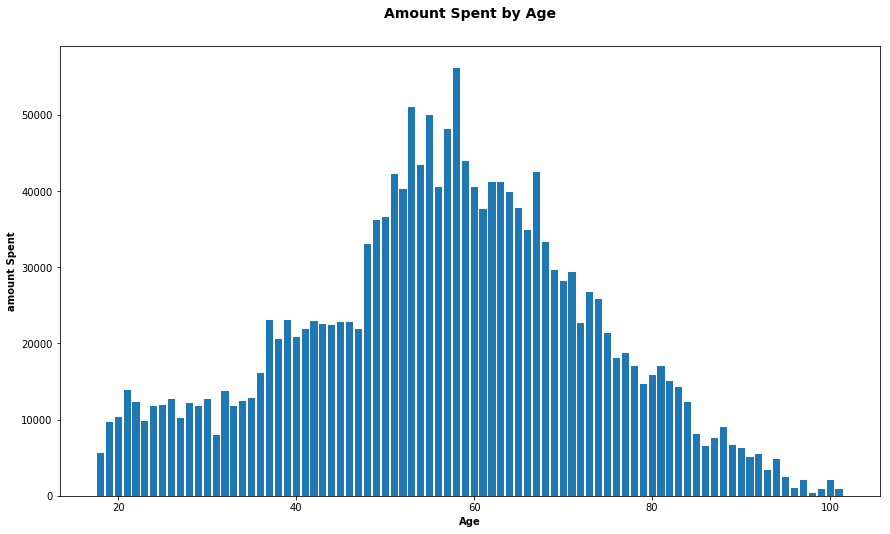

In [46]:
plt.figure(figsize=[14.70, 8.27])
plt.bar(amount_by_age.keys(), amount_by_age.values())
plt.title('Amount Spent by Age', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('amount Spent', fontweight='bold');

*The amount spent corresponds to age distribution. Customers between 50 & 70 years spend the most.*

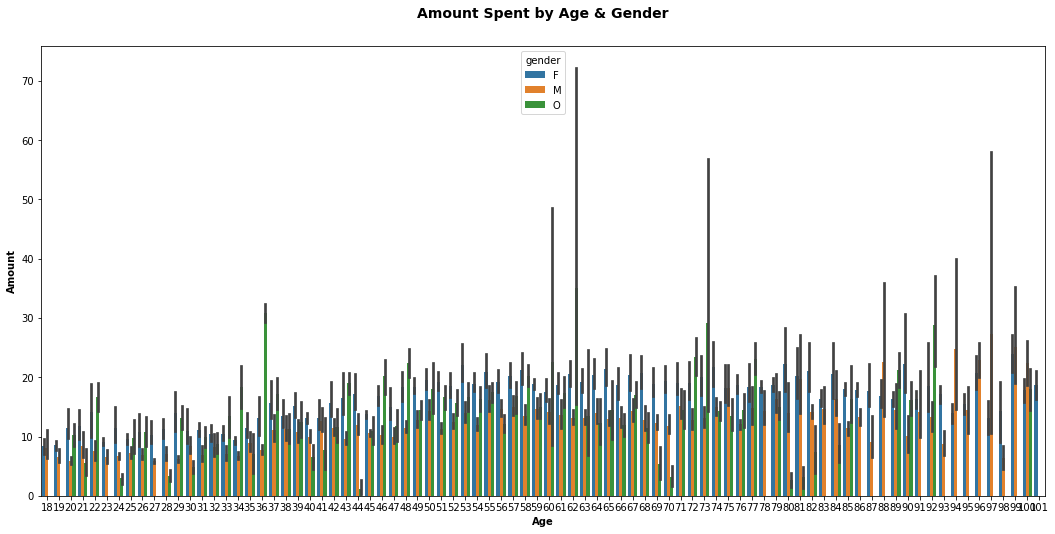

In [47]:
plt.figure(figsize=[18, 8.27])
base_color = sb.color_palette()[0]
#month_order = df_2020['month'].value_counts().index
sb.barplot(final_df.age, final_df.amount, hue = final_df.gender)
plt.title('Amount Spent by Age & Gender', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Amount', fontweight='bold');

In [48]:
amount_by_age_gender = final_df.groupby(['gender', 'age'])['amount'].sum()
amount_by_age_gender

gender  age
F       18      1116.82
        19      2990.83
        20      4452.94
        21      5579.64
        22      6388.99
        23      3165.89
        24      5368.55
        25      4157.34
        26      5178.99
        27      3985.07
        28      5633.70
        29      6338.58
        30      4435.68
        31      2500.90
        32      5430.00
        33      5253.53
        34      5102.91
        35      5207.71
        36      7346.77
        37      8474.94
        38      8741.49
        39     10878.86
        40      8510.30
        41      7547.21
        42      8374.48
        43      9762.84
        44      9894.74
        45      9662.18
        46     10379.94
        47      9704.48
                 ...   
O       58      1252.75
        59       585.18
        60      1306.78
        61       627.40
        62       944.90
        63       576.85
        64       171.15
        65        57.72
        66       620.23
        67      1263.25
    

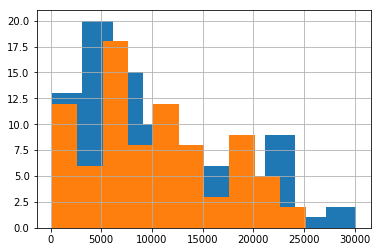

In [49]:
amount_by_age_gender['F'].hist()
amount_by_age_gender['M'].hist()
plt.legend()

In [75]:
# Assigning names to 'offer received', 'offer viewed', 'offer completed', and 'transaction' to facilitate recall and comparison
offer_received = final_df.event == 'offer received'
offer_viewed = final_df.event == 'offer viewed'
offer_completed = final_df.event == 'offer completed'
transaction = final_df.event == 'transaction'

In [51]:
final_df[offer_received].count()

person              66501
age                 66501
gender              66501
income              66501
became_member_on    66501
event               66501
event_time          66501
offer_type          66501
offer_reward        66501
earned_reward           0
amount                  0
offer_id            66501
channels            66501
difficulty          66501
offer_duration      66501
dtype: int64

*66501 clients of known demographics received offers.*

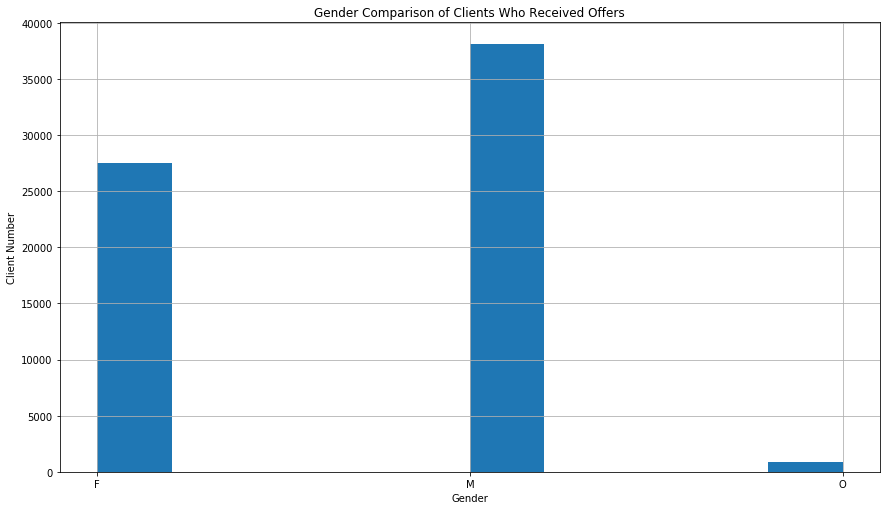

In [52]:
# Compare genders of those who received offers.
plt.figure(figsize=[14.70, 8.27])
final_df.gender[offer_received].hist()
plt.title('Gender Comparison of Clients Who Received Offers')
plt.xlabel('Gender')
plt.ylabel('Client Number');

In [53]:
final_df.gender[offer_received].value_counts()

M    38129
F    27456
O      916
Name: gender, dtype: int64

In [54]:
final_df[offer_received].groupby(['gender', 'offer_type']).count()

person    age  income  became_member_on  event  \
gender offer_type                                                      
F      bogo            10975  10975   10975             10975  10975   
       discount        10943  10943   10943             10943  10943   
       informational    5538   5538    5538              5538   5538   
M      bogo            15208  15208   15208             15208  15208   
       discount        15354  15354   15354             15354  15354   
       informational    7567   7567    7567              7567   7567   
O      bogo              354    354     354               354    354   
       discount          367    367     367               367    367   
       informational     195    195     195               195    195   

                      event_time  offer_reward  earned_reward  amount  \
gender offer_type                                                       
F      bogo                10975         10975              0       0   
       discount            10943         10943              0       0   
       informational        5538          5538              0       0   
M      bogo                15208         15208              0       0   
       discount            15354         15354              0       0   
       informational        7567          7567              0       0   
O      bogo                  354           354              0       0   
       discount              367           367              0       0   
       informational         195           195              0       0   

                      offer_id  channels  difficulty  offer_duration  
gender offer_type                                                     
F      bogo              10975     10975       10975           10975  
       discount          10943     10943       10943           10943  
       informational      5538      5538        5538            5538  
M      bogo              15208     15208       15208           15208  
       discount          15354     15354       15354           15354  
       informational      7567      7567        7567            7567  
O      bogo                354       354         354             354  
       discount            367       367         367             367  
       informational       195       195         195             195

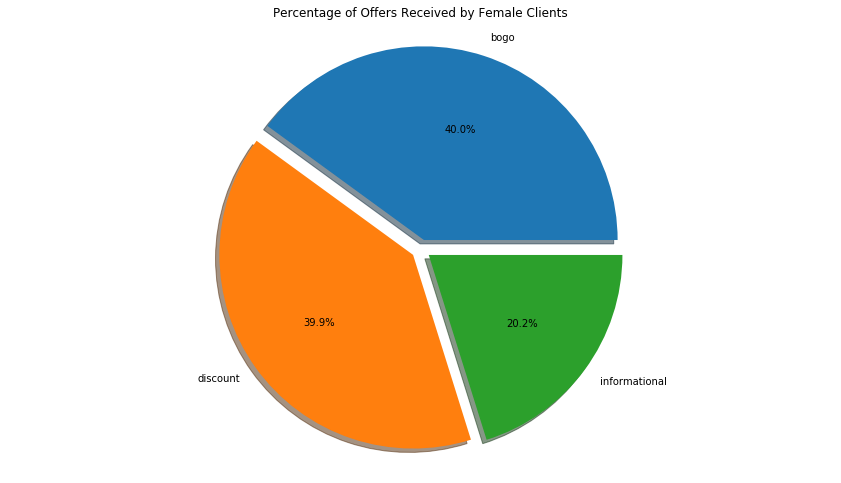

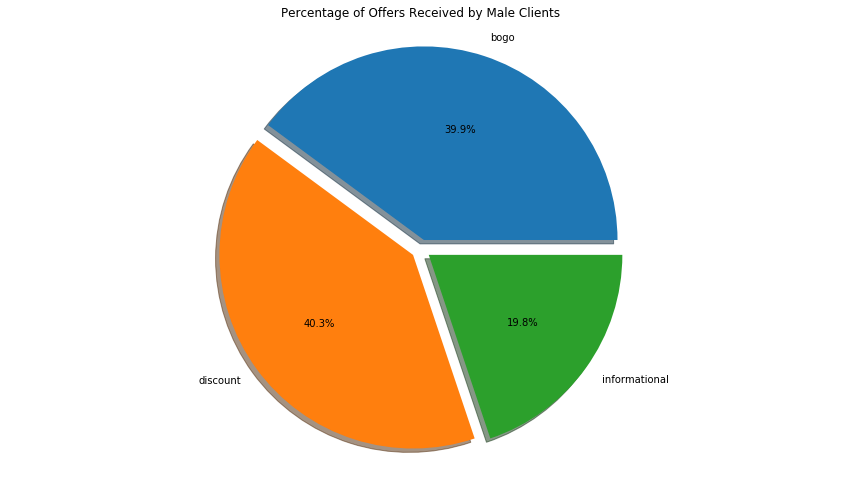

In [55]:
# Creating a pie chart of offers received by female clients
plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_received].groupby(['gender', 'offer_type']).count()[:3].person,
       labels = ['bogo', 'discount', 'informational'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05, 0.05)
       )
plt.title('Percentage of Offers Received by Female Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt

plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_received].groupby(['gender', 'offer_type']).count()[3:6].person,
       labels = ['bogo', 'discount', 'informational'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05, 0.05)
       )
plt.title('Percentage of Offers Received by Male Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt


*Almost the same percent of offer types was received by both males and females*

In [56]:
final_df[offer_viewed].count()

person              49860
age                 49860
gender              49860
income              49860
became_member_on    49860
event               49860
event_time          49860
offer_type          49860
offer_reward        49860
earned_reward           0
amount                  0
offer_id            49860
channels            49860
difficulty          49860
offer_duration      49860
dtype: int64

*Only 49860 of clients who received offers viewed them. That's 74.9%*

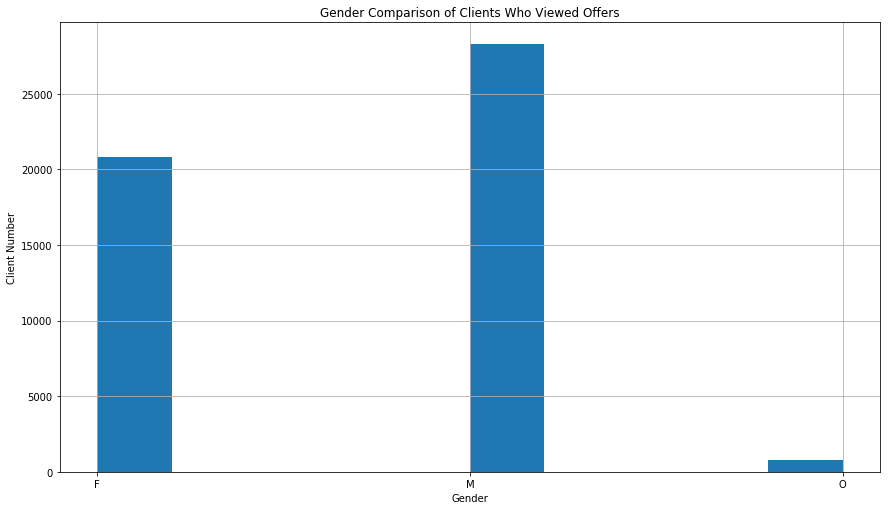

In [57]:
# Compare genders of those who viewed offers.
plt.figure(figsize=[14.70, 8.27])
final_df.gender[offer_viewed].hist()
plt.legend()
plt.title('Gender Comparison of Clients Who Viewed Offers')
plt.xlabel('Gender')
plt.ylabel('Client Number');

In [58]:
final_df.gender[offer_viewed].value_counts()

M    28301
F    20786
O      773
Name: gender, dtype: int64

In [59]:
final_df[offer_viewed].groupby(['gender', 'offer_type']).count()

person    age  income  became_member_on  event  \
gender offer_type                                                      
F      bogo             9143   9143    9143              9143   9143   
       discount         7733   7733    7733              7733   7733   
       informational    3910   3910    3910              3910   3910   
M      bogo            12581  12581   12581             12581  12581   
       discount        10431  10431   10431             10431  10431   
       informational    5289   5289    5289              5289   5289   
O      bogo              315    315     315               315    315   
       discount          297    297     297               297    297   
       informational     161    161     161               161    161   

                      event_time  offer_reward  earned_reward  amount  \
gender offer_type                                                       
F      bogo                 9143          9143              0       0   
       discount             7733          7733              0       0   
       informational        3910          3910              0       0   
M      bogo                12581         12581              0       0   
       discount            10431         10431              0       0   
       informational        5289          5289              0       0   
O      bogo                  315           315              0       0   
       discount              297           297              0       0   
       informational         161           161              0       0   

                      offer_id  channels  difficulty  offer_duration  
gender offer_type                                                     
F      bogo               9143      9143        9143            9143  
       discount           7733      7733        7733            7733  
       informational      3910      3910        3910            3910  
M      bogo              12581     12581       12581           12581  
       discount          10431     10431       10431           10431  
       informational      5289      5289        5289            5289  
O      bogo                315       315         315             315  
       discount            297       297         297             297  
       informational       161       161         161             161

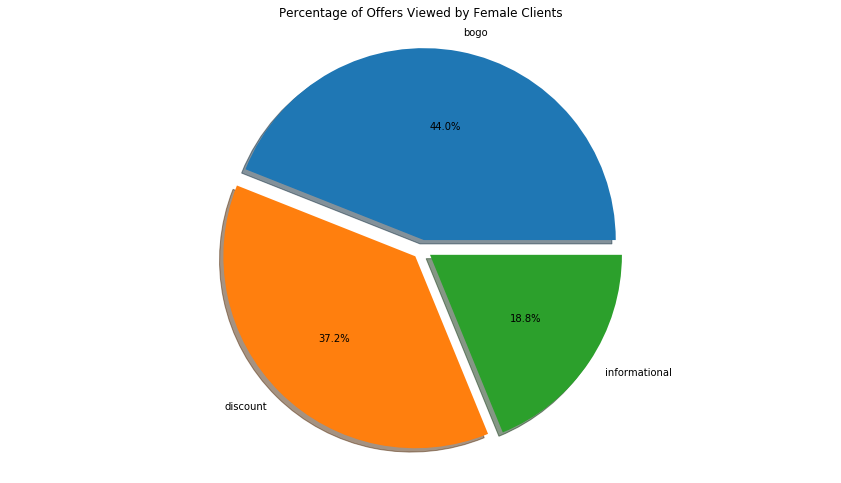

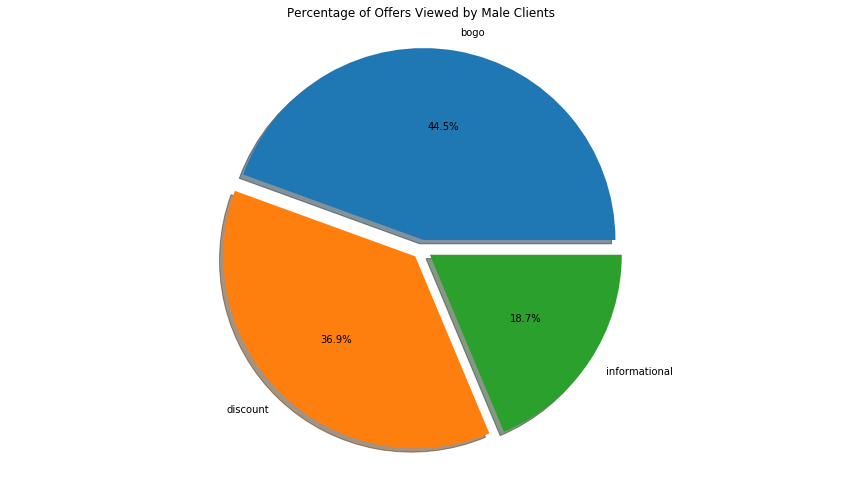

In [60]:
# Creating a pie chart of offers viewed by female clients
plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_viewed].groupby(['gender', 'offer_type']).count()[:3].person,
       labels = ['bogo', 'discount', 'informational'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05, 0.05)
       )
plt.title('Percentage of Offers Viewed by Female Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt

# Creating a pie chart of offers viewed by male clients
plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_viewed].groupby(['gender', 'offer_type']).count()[3:6].person,
       labels = ['bogo', 'discount', 'informational'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05, 0.05)
       )
plt.title('Percentage of Offers Viewed by Male Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt


*Almost the same percent of offer types was viewed by both males and females*

In [61]:
final_df[offer_completed].count()

person              32444
age                 32444
gender              32444
income              32444
became_member_on    32444
event               32444
event_time          32444
offer_type          32444
offer_reward        32444
earned_reward       32444
amount                  0
offer_id            32444
channels            32444
difficulty          32444
offer_duration      32444
dtype: int64

*Only 32444 of the received offers were completed.That's 48.79%*

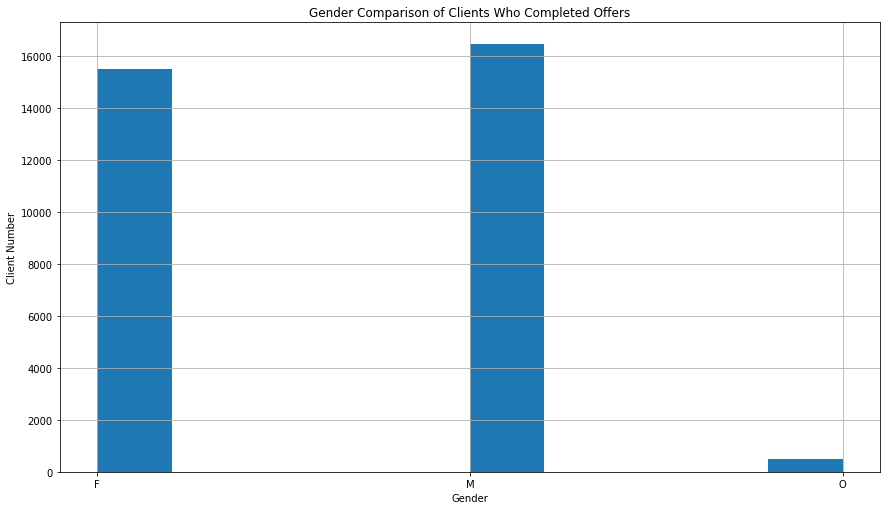

In [62]:
# Compare genders of those who completed offers.
plt.figure(figsize=[14.70, 8.27])
final_df.gender[offer_completed].hist()
plt.legend()
plt.title('Gender Comparison of Clients Who Completed Offers')
plt.xlabel('Gender')
plt.ylabel('Client Number');

In [63]:
final_df.gender[offer_completed].value_counts()

M    16466
F    15477
O      501
Name: gender, dtype: int64

In [64]:
print ('Percent of females who completed offers of those who received offers = ', final_df.gender[offer_completed].value_counts()[1]/
final_df.gender[offer_received].value_counts()[1]*100, '%')

Percent of females who completed offers of those who received offers =  56.3701923077 %


In [65]:
print ('Percent of males who completed offers of those who received offers = ', final_df.gender[offer_completed].value_counts()[0]/
final_df.gender[offer_received].value_counts()[0]*100, '%')

Percent of males who completed offers of those who received offers =  43.1849773139 %


*Number of male customers who received, viewed, and completed offers is more than females.*

*Number of female customers who completed offers is very close to male customers*

*Percent of females who completed offers if higher than that of males. Therefore the company should focus on sending more offers to females.*

*Other gender doesn't have significant influence on analysis results and can be neglected through the whole analysis process.*

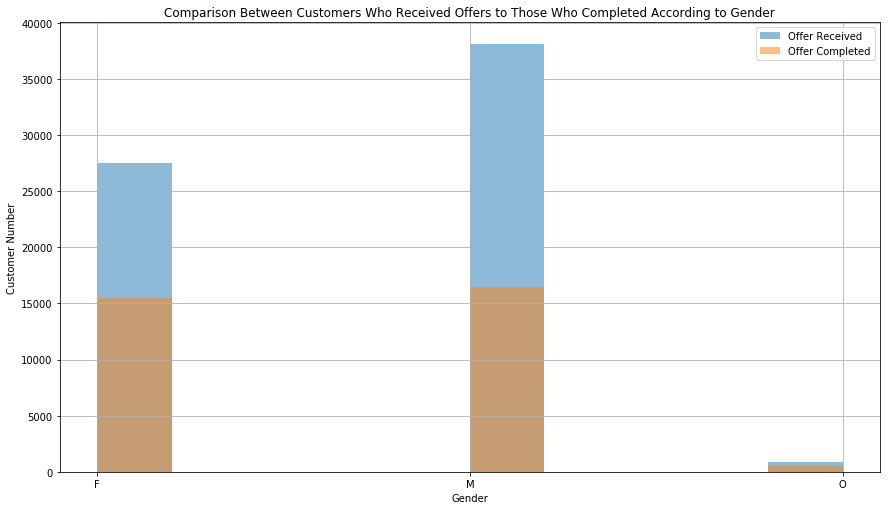

In [66]:
# Compare genders of those who received offers to those who completed offers.
plt.figure(figsize=[14.70, 8.27])
final_df.gender[offer_received].hist(alpha = 0.5, label = 'Offer Received')
final_df.gender[offer_completed].hist(alpha = 0.5, label = 'Offer Completed')
plt.legend()
plt.title('Comparison Between Customers Who Received Offers to Those Who Completed According to Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Number');

In [67]:
final_df[offer_completed].groupby(['gender', 'offer_type']).count()

person   age  income  became_member_on  event  event_time  \
gender offer_type                                                              
F      bogo          7501  7501    7501              7501   7501        7501   
       discount      7976  7976    7976              7976   7976        7976   
M      bogo          7512  7512    7512              7512   7512        7512   
       discount      8954  8954    8954              8954   8954        8954   
O      bogo           245   245     245               245    245         245   
       discount       256   256     256               256    256         256   

                   offer_reward  earned_reward  amount  offer_id  channels  \
gender offer_type                                                            
F      bogo                7501           7501       0      7501      7501   
       discount            7976           7976       0      7976      7976   
M      bogo                7512           7512       0      7512      7512   
       discount            8954           8954       0      8954      8954   
O      bogo                 245            245       0       245       245   
       discount             256            256       0       256       256   

                   difficulty  offer_duration  
gender offer_type                              
F      bogo              7501            7501  
       discount          7976            7976  
M      bogo              7512            7512  
       discount          8954            8954  
O      bogo               245             245  
       discount           256             256

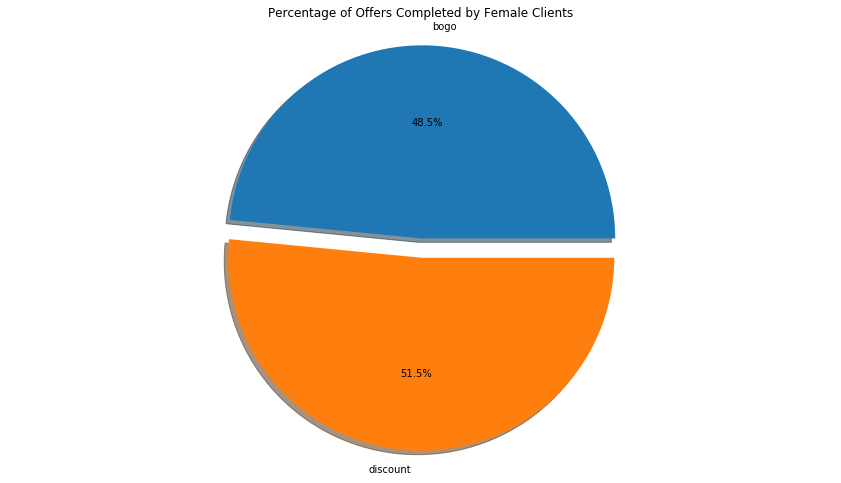

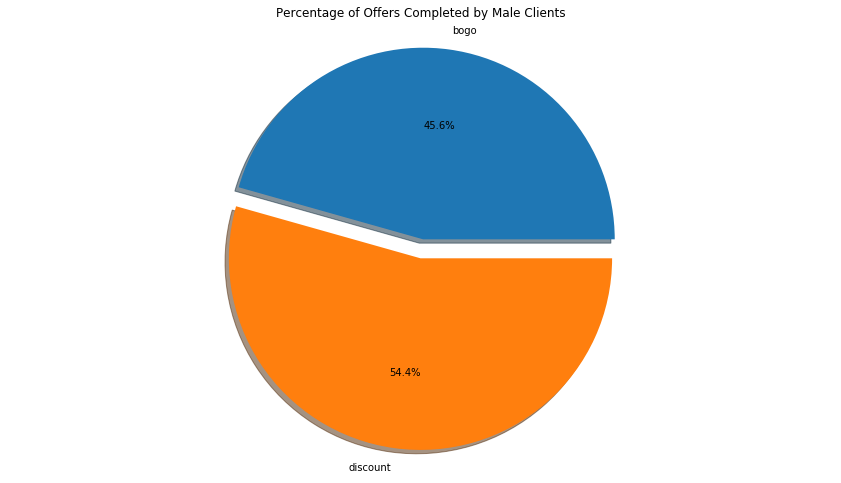

In [68]:
# Creating a pie chart of offers completed by female clients
plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_completed].groupby(['gender', 'offer_type']).count()[:2].person,
       labels = ['bogo', 'discount'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05)
       )
plt.title('Percentage of Offers Completed by Female Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt

# Creating a pie chart of offers completed by male clients
plt.figure(figsize=[14.7,  8.27])
plt.pie(final_df[offer_completed].groupby(['gender', 'offer_type']).count()[2:4].person,
       labels = ['bogo', 'discount'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.05, 0.05)
       )
plt.title('Percentage of Offers Completed by Male Clients')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This line remove this tilt


*Both males and females responded more to discount offers.*

*More males (54.4%) responded to discount offers than females (51.5%).*

*More females (48.5%) responded to bogo offers than males (45.6%).*

<a id='refining'></a>
### C. Refinement

In [69]:
# Repeat previous process with age

In [70]:
final_df[offer_completed].groupby(['age', 'offer_type', 'gender']).count()

person  income  became_member_on  event  event_time  \
age offer_type gender                                                        
18  bogo       F           15      15                15     15          15   
               M           41      41                41     41          41   
    discount   F           15      15                15     15          15   
               M           58      58                58     58          58   
19  bogo       F           32      32                32     32          32   
               M           53      53                53     53          53   
    discount   F           22      22                22     22          22   
               M           84      84                84     84          84   
20  bogo       F           40      40                40     40          40   
               M           59      59                59     59          59   
               O            4       4                 4      4           4   
    discount   F           35      35                35     35          35   
               M           75      75                75     75          75   
               O            3       3                 3      3           3   
21  bogo       F           49      49                49     49          49   
               M           58      58                58     58          58   
               O            1       1                 1      1           1   
    discount   F           56      56                56     56          56   
               M           74      74                74     74          74   
               O            3       3                 3      3           3   
22  bogo       F           41      41                41     41          41   
               M           50      50                50     50          50   
               O            1       1                 1      1           1   
    discount   F           51      51                51     51          51   
               M           67      67                67     67          67   
               O            1       1                 1      1           1   
23  bogo       F           23      23                23     23          23   
               M           72      72                72     72          72   
    discount   F           40      40                40     40          40   
               M           91      91                91     91          91   
...                       ...     ...               ...    ...         ...   
94  bogo       M           22      22                22     22          22   
    discount   F           16      16                16     16          16   
               M           24      24                24     24          24   
95  bogo       F           20      20                20     20          20   
               M            6       6                 6      6           6   
    discount   F           19      19                19     19          19   
               M            4       4                 4      4           4   
96  bogo       F            9       9                 9      9           9   
               M            3       3                 3      3           3   
    discount   F            9       9                 9      9           9   
               M            6       6                 6      6           6   
97  bogo       F            9       9                 9      9           9   
               M            5       5                 5      5           5   
    discount   F            5       5                 5      5           5   
               M            8       8                 8      8           8   
98  bogo       F            1       1                 1      1           1   
               M            2       2                 2      2           2   
    discount   F            1       1                 1      1           1   
               M            2       2        

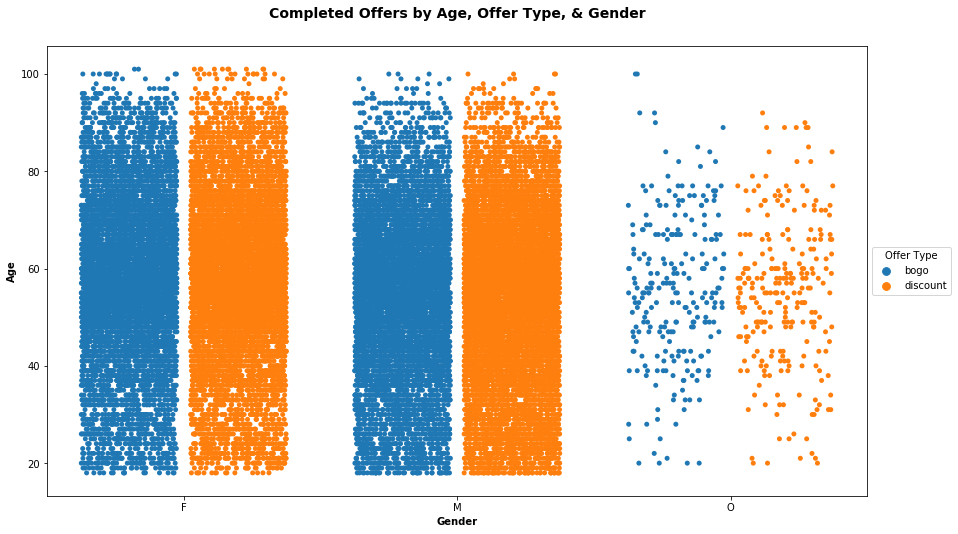

In [71]:
# scatterplot - duration and month - by user type

plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = final_df[offer_completed], x = 'gender', y = 'age', hue = 'offer_type',
jitter = 0.35, dodge = True)
plt.legend(loc= 'center left', bbox_to_anchor = (1, 0.5), title = 'Offer Type')
plt.title('Completed Offers by Age, Offer Type, & Gender', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Age', fontweight='bold');

In [72]:
#scatter plot between income and purchase

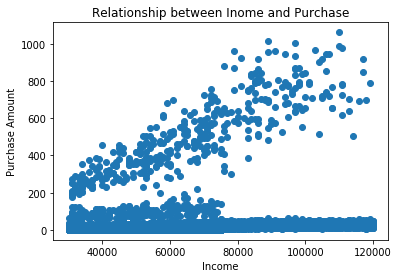

In [86]:
plt.scatter(final_df.income[transaction], final_df.amount[transaction])
plt.title('Relationship between Inome and Purchase')
plt.xlabel('Income')
plt.ylabel('Purchase Amount');

*Interesting! It seems there is a group of people whose purchse habbits don't change whith the change of their income.*

In [78]:
final_df[transaction]

,person,age,gender,income,became_member_on,event,event_time,offer_type,offer_reward,earned_reward,amount,offer_id,channels,difficulty,offer_duration
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,18,NaN,NaN,NaN,21.51,NaN,NaN,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,144,NaN,NaN,NaN,32.28,NaN,NaN,NaN,NaN
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,transaction,528,NaN,NaN,NaN,23.22,NaN,NaN,NaN,NaN
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,132,NaN,NaN,NaN,19.89,NaN,NaN,NaN,NaN
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,144,NaN,NaN,NaN,17.78,NaN,NaN,NaN,NaN
13,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,222,NaN,NaN,NaN,19.67,NaN,NaN,NaN,NaN
14,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,240,NaN,NaN,NaN,29.72,NaN,NaN,NaN,NaN
15,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,378,NaN,NaN,NaN,23.93,NaN,NaN,NaN,NaN
19,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,510,NaN,NaN,NaN,21.72,NaN,NaN,NaN,NaN
22,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,transaction,534,NaN,NaN,NaN,26.56,NaN,NaN,NaN,NaN


In [84]:
final_df.income[transaction].value_counts().sort_index(ascending=False)

120000.0      86
119000.0     326
118000.0     393
117000.0     219
116000.0     280
115000.0     306
114000.0     370
113000.0     301
112000.0     239
111000.0     311
110000.0     354
109000.0     346
108000.0     331
107000.0     236
106000.0     349
105000.0     362
104000.0     331
103000.0     390
102000.0     309
101000.0     288
100000.0     525
99000.0      817
98000.0      681
97000.0      781
96000.0      827
95000.0      814
94000.0      726
93000.0      825
92000.0      856
91000.0      618
            ... 
59000.0     2163
58000.0     2093
57000.0     2557
56000.0     2461
55000.0     2297
54000.0     2456
53000.0     2516
52000.0     2575
51000.0     2369
50000.0     2386
49000.0     1590
48000.0     1777
47000.0     1919
46000.0     1784
45000.0     1974
44000.0     1794
43000.0     1578
42000.0     1778
41000.0     1987
40000.0     2014
39000.0     2126
38000.0     1843
37000.0     2140
36000.0     2015
35000.0     2092
34000.0     2047
33000.0     2120
32000.0     22

In [85]:
final_df.amount[transaction].value_counts().sort_index(ascending=False)

1062.28      1
1015.73      1
1001.85      1
989.34       1
977.78       1
966.24       1
962.10       1
961.21       1
957.15       1
947.43       1
943.40       1
943.33       1
936.94       1
922.65       1
920.01       1
919.16       1
918.02       1
901.37       1
881.35       1
872.77       1
871.51       1
868.07       1
863.32       1
862.16       1
855.31       1
850.36       1
845.01       1
841.45       1
841.06       1
840.28       1
          ... 
0.34        55
0.33        70
0.32        70
0.31        73
0.30        68
0.29        72
0.28        55
0.27        73
0.26        75
0.25        53
0.24        73
0.23        70
0.22        63
0.21        58
0.20        59
0.19        55
0.18        50
0.17        51
0.16        64
0.15        58
0.14        57
0.13        50
0.12        44
0.11        50
0.10        36
0.09        42
0.08        52
0.07        37
0.06        43
0.05       133
Name: amount, Length: 5036, dtype: int64